<a href="https://colab.research.google.com/github/Filipriec/zaklady_pythonu/blob/main/6_statistika.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Štatistika

https://code.farmeris.sk/python/hod2_statistika Podla poznámok je treba vyriešiť cieľ zadania:

**Zistiť, ako teplota ovplyvňuje dojazd elektromobilu pomocou lineárnej regresie, štandardnej chyby a intervalov spoľahlivosti.**

In [9]:
import numpy as np
import math
from scipy import stats

In [10]:
# Teploty (v °C)
#x = # Os x ma obsahovat hodnoty teplôt [0, 10, 20, 30, 40]
x = np.array([0, 10, 20, 30, 40])
#y_data = # Dojazdy (štvorica meraní pre každú teplotu)
#450, 446, 455, 442
#429, 423, 432, 420
#404, 399, 392, 405
#377, 371, 369, 382
#351, 348, 355, 344
y_data = np.array([
    [450, 446, 455, 442],
    [429, 423, 432, 420],
    [404, 399, 392, 405],
    [377, 371, 369, 382],
    [351, 348, 355, 344]
])

# Kontrola tvaru poľa
print("Počet teplôt:", len(x))
print("Počet meraní na teplotu:", len(y_data[0]))

Počet teplôt: 5
Počet meraní na teplotu: 4


## Priemer

$$
\bar{R}_t = \frac{1}{n} \sum R_{ti}
$$

Vytvoríme vlastnú funkciu, ktorá vypočíta priemer čísel zo zoznamu.  
Potom ju použijeme na každú skupinu meraní.

In [11]:
$#def priemer(vstup):
  # telo funkcie
#  return # nieco

def priemer(zoznam):
    sucet = 0
    for cislo in zoznam:
        sucet += cislo
    return sucet / len(zoznam)

y_mean = []
for merania in y_data:
    y_mean.append(priemer(merania))
y_mean = np.array(y_mean)

print("Priemerné hodnoty:", y_mean)

Priemerné hodnoty: [448.25 426.   400.   374.75 349.5 ]


## Smerodajná odchýlka

$$
s_t = \sqrt{\frac{1}{n-1} \sum (R_{ti} - \bar{R}_t)^2}
$$

Vyjadruje, ako veľmi sa jednotlivé merania líšia od priemeru.

In [15]:
def smerodajna_odchylka(zoznam):
    p = priemer(zoznam)
    sucet = 0
    for cislo in zoznam:
        sucet += (cislo - p) ** 2
    return math.sqrt(sucet / (len(zoznam) - 1))

y_std = []
for merania in y_data:
    y_std.append(smerodajna_odchylka(merania))
y_std = np.array(y_std)

print("Smerodajné odchýlky:", y_std)

Smerodajné odchýlky: [5.56027577 5.47722558 5.94418483 5.90903263 4.65474668]


## Štandardná chyba

$$
SE_t = \frac{s_t}{\sqrt{n}}
$$

Pomáha odhadnúť presnosť priemeru.

In [20]:
def standardna_chyba(s, n):
    return s / math.sqrt(n)

n = y_data.shape[1]
y_se = [standardna_chyba(s, n) for s in y_std]
y_se = np.array(y_se)

print("Štandardná chyba:", y_se)

Štandardná chyba: [2.78013789 2.73861279 2.97209242 2.95451632 2.32737334]


## 95 % Interval spoľahlivosti

$$
CI_t = t_{\alpha/2,n-1}\cdot SE_t
$$

Udáva, v akom rozpätí by sa mohol nachádzať „pravý“ priemer.  
Použijeme hodnotu *t* z t‑rozdelenia pre \\(n = 4\\) merania.

In [18]:
alpha = 0.05
t_val = stats.t.ppf(1 - alpha / 2, n - 1)
y_ci = [t_val * se for se in y_se]
y_ci = np.array(y_ci)

print("95 % intervaly spoľahlivosti:", y_ci)

95 % intervaly spoľahlivosti: [8.84763954 8.71548815 9.45852453 9.40258954 7.40674069]


## Lineárna regresia

Pomocou metódy *najmenších štvorcov* určíme priamku, ktorá najlepšie vystihuje závislosť medzi teplotou a dojazdom:
$$
\hat{R} = a + bT
$$

In [19]:
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y_mean)

print(f"y = {intercept:.2f} + {slope:.2f}x")
print(f"R² = {r_value**2:.4f}")

y = 449.45 + -2.49x
R² = 0.9994


## Predikcia dojazdu pri 13,5 °C

In [21]:
x_pred = 13.5
y_pred = intercept + slope * x_pred
print(f"Odhadovaný dojazd pri {x_pred}°C: {y_pred:.2f} km")

Odhadovaný dojazd pri 13.5°C: 415.87 km


## Grafické znázornenie

Zobrazíme:
- modré body = priemery z meraní  
- červenú priamku = lineárnu regresiu  
- zelený bod = predpoveď pri 13,5 °C  
- chybové úsečky = interval spoľahlivosti

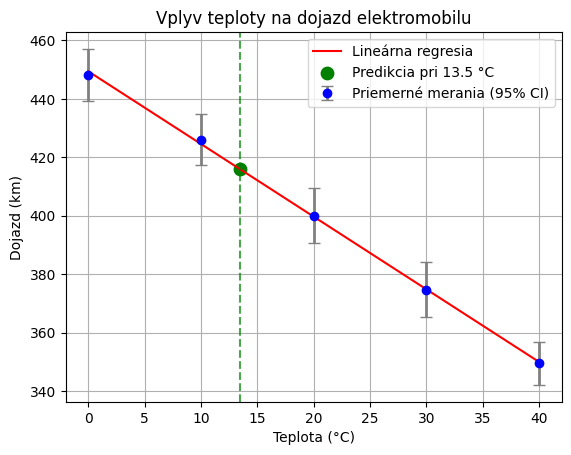

In [28]:
import matplotlib.pyplot as plt
x_line = np.linspace(0, 40, 100)
y_line = intercept + slope * x_line
plt.errorbar(
    x,
    y_mean,
    yerr=y_ci,             # 95% confidence intervals
    fmt="o",
    color="blue",
    ecolor="gray",
    elinewidth=2,
    capsize=4,
    label="Priemerné merania (95% CI)"
)
plt.plot(x_line, y_line, color="red", label="Lineárna regresia")

plt.axvline(x_pred, color="green", linestyle="--", alpha=0.7)
plt.scatter(x_pred, y_pred, color="green", s=80, label=f"Predikcia pri {x_pred} °C")
plt.xlabel("Teplota (°C)")
plt.ylabel("Dojazd (km)")
plt.title("Vplyv teploty na dojazd elektromobilu")
plt.legend()
plt.grid(True)
plt.show()